In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os

datake = 0
file = os.listdir('./set_b')[datake]
wav_file = wave.open('./set_b/'+file, 'rb')

num_channels = wav_file.getnchannels()
sample_width = wav_file.getsampwidth()
frame_rate = wav_file.getframerate()  #Sample rate (samples per second)
num_frames = wav_file.getnframes()
duration = num_frames / float(frame_rate)  #dalam seconds

print(f"Channels: {num_channels}")
print(f"Sample Width: {sample_width} bytes")
print(f"Frame Rate: {frame_rate} Hz")
print(f"Number of Frames: {num_frames}")
print(f"Duration: {duration:.2f} seconds")

Channels: 1
Sample Width: 2 bytes
Frame Rate: 4000 Hz
Number of Frames: 42385
Duration: 10.60 seconds


Audio Array: [-204 -117   90 ...  495  575  594]
Array Shape: (42385,)


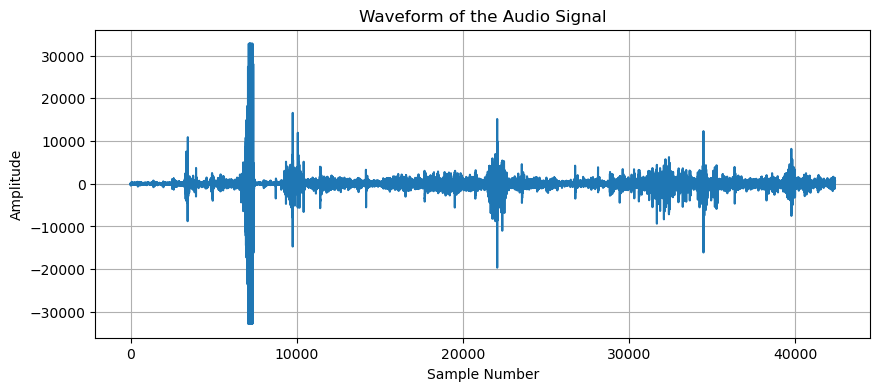

In [ ]:
frames = wav_file.readframes(num_frames)
wav_file.close()                          

audio_data = np.frombuffer(frames, dtype=np.int16)

if num_channels > 1:
    audio_data = np.reshape(audio_data, (-1, num_channels))

print("Audio Array:", audio_data)
print("Array Shape:", audio_data.shape)

plt.figure(figsize=(10, 4))
if num_channels > 1:
    plt.plot(audio_data[:, 0])  
else:
    plt.plot(audio_data)        
plt.title('Waveform of the Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [5]:
from IPython.display import Audio
audio_to_play = audio_data[:, 0] if num_channels > 1 else audio_data

Audio(audio_to_play, rate=frame_rate)

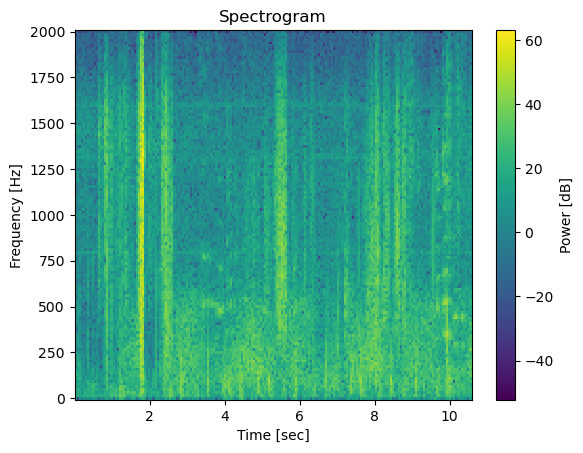

In [7]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(audio_data[:,0] if num_channels > 1 else audio_data, frame_rate)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()